Ngrams_title 

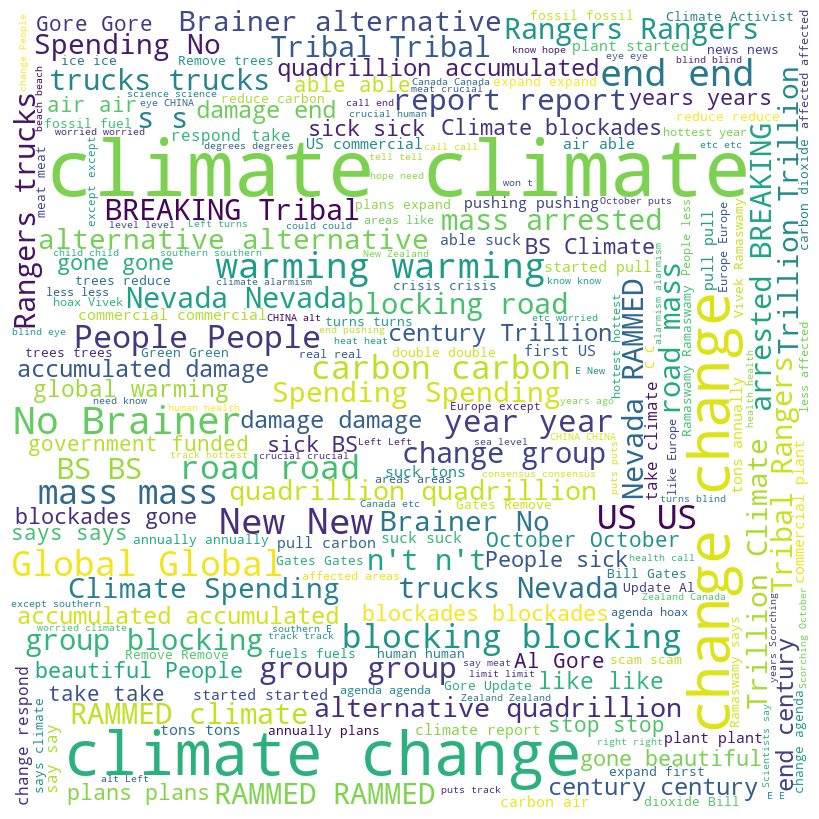

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('processed_test.csv')

# Concatenate all the ngrams.title into a single string
text = ' '.join(df['ngrams.title'].dropna())

# Define a list of stopwords, if needed
stopwords = set(["word1", "word2"])  # Replace with actual stopwords

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=stopwords, min_font_size=10,
                      colormap='viridis', max_words=250).generate(text)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Save the word cloud image, optional
plt.savefig('wordcloud.png')

plt.show()



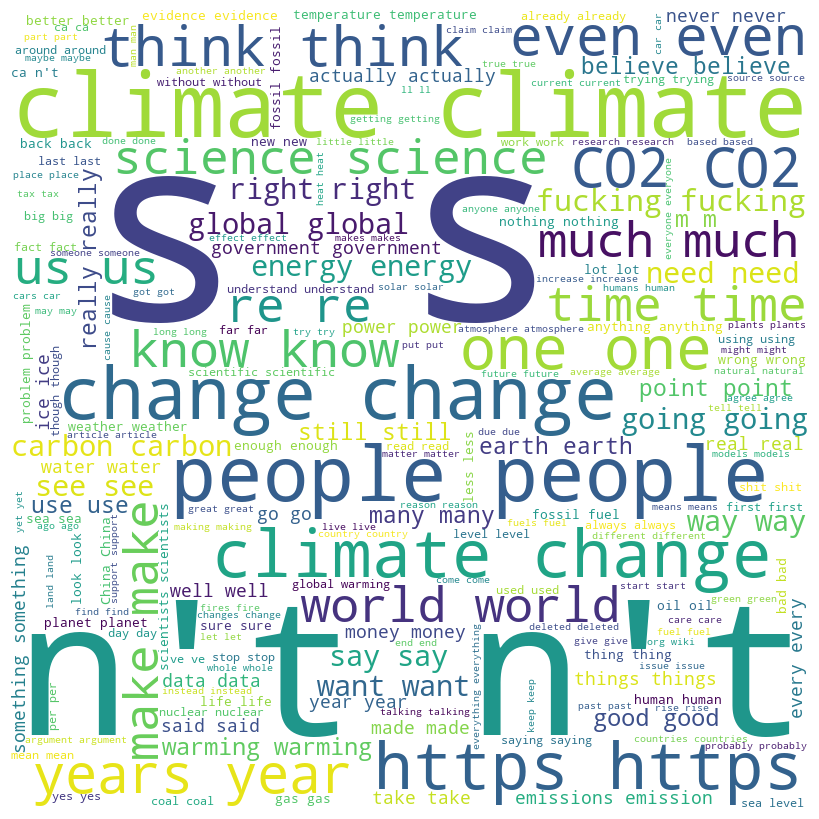

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('processed_test.csv')

# Concatenate all the ngrams.comment into a single string
text = ' '.join(df['ngrams.comment'].dropna())

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      min_font_size=10).generate(text)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [13]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming stopwords are already downloaded
stop_words = set(stopwords.words('english'))

# Modified function to generate and filter n-grams
def generate_filtered_ngrams(text, n=2):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    generated_ngrams = ngrams(filtered_words, n)
    # Filter out n-grams with consecutive identical words
    filtered_ngrams = [' '.join(gram) for gram in generated_ngrams if len(set(gram)) == len(gram)]
    return ', '.join(filtered_ngrams)

# Example usage with your DataFrame
df = pd.read_csv('processed_test.csv')
df['ngrams.comment'] = df['comment'].astype(str).apply(lambda x: generate_filtered_ngrams(x, 2))

# Concatenate all the ngrams.comment into a single string
text = ' '.join(df['ngrams.comment'].dropna())

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      min_font_size=10).generate(text)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


NameError: name 'ngrams' is not defined

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


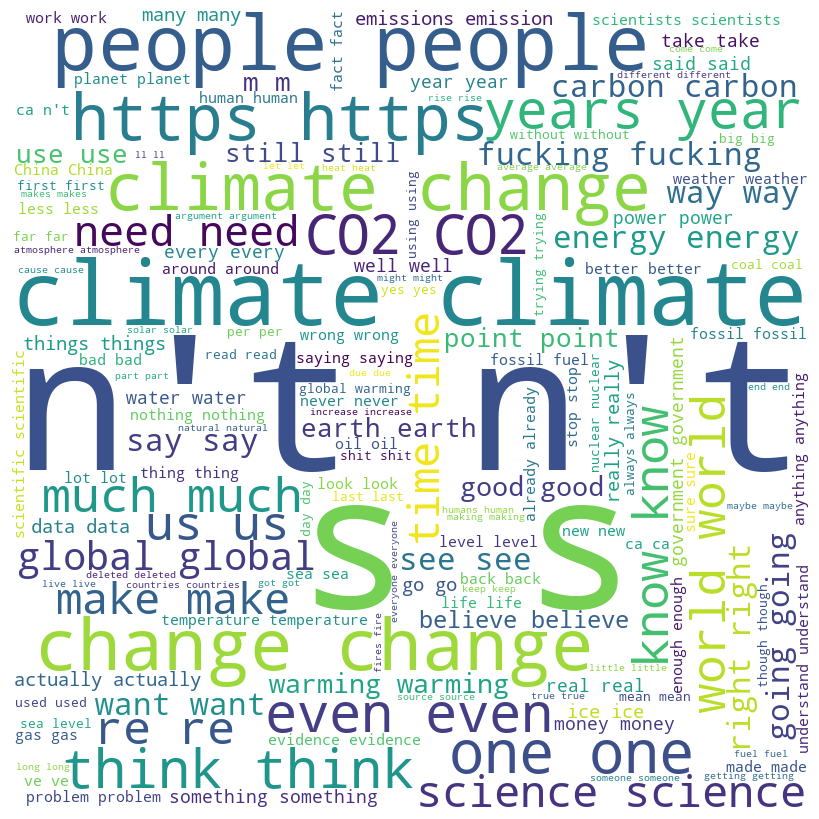

In [14]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Set of English stop words
stop_words = set(stopwords.words('english'))

# Modified function to generate and filter n-grams
def generate_filtered_ngrams(text, n=2):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    generated_ngrams = ngrams(filtered_words, n)
    # Filter out n-grams with consecutive identical words
    filtered_ngrams = [' '.join(gram) for gram in generated_ngrams if len(set(gram)) == len(gram)]
    return ', '.join(filtered_ngrams)

# Example usage with your DataFrame
df = pd.read_csv('processed_test.csv')
df['ngrams.comment'] = df['comment'].astype(str).apply(lambda x: generate_filtered_ngrams(x, 2))

# Concatenate all the ngrams.comment into a single string
text = ' '.join(df['ngrams.comment'].dropna())

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      min_font_size=10).generate(text)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the data
df = pd.read_csv('processed_test.csv')

# Filter to the top 10 authors
top_authors = df['author'].value_counts().head(10).index
top_authors_df = df[df['author'].isin(top_authors)]

# Create a dictionary of n-grams and their average sentiment
ngrams_sentiment = {}
for index, row in top_authors_df.iterrows():
    ngrams = row['ngrams.comment'].split(', ')  # Assuming ngrams are comma separated
    for ngram in ngrams:
        if ngram not in ngrams_sentiment:
            ngrams_sentiment[ngram] = []
        ngrams_sentiment[ngram].append(row['vader.comment'])

# Average sentiment for each n-gram
average_sentiment = {ngram: sum(values)/len(values) for ngram, values in ngrams_sentiment.items()}

# Define a function to color the n-grams based on sentiment
def color_func(word, **kwargs):
    sentiment = average_sentiment.get(word, 0)
    if sentiment > 0:
        return "hsl(120, 100%, 50%)"  # Green for positive
    elif sentiment < 0:
        return "hsl(0, 100%, 50%)"    # Red for negative
    else:
        return "hsl(60, 100%, 50%)"   # Yellow for neutral

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      color_func=color_func, repeat=False).generate_from_frequencies(average_sentiment)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


AttributeError: 'float' object has no attribute 'split'

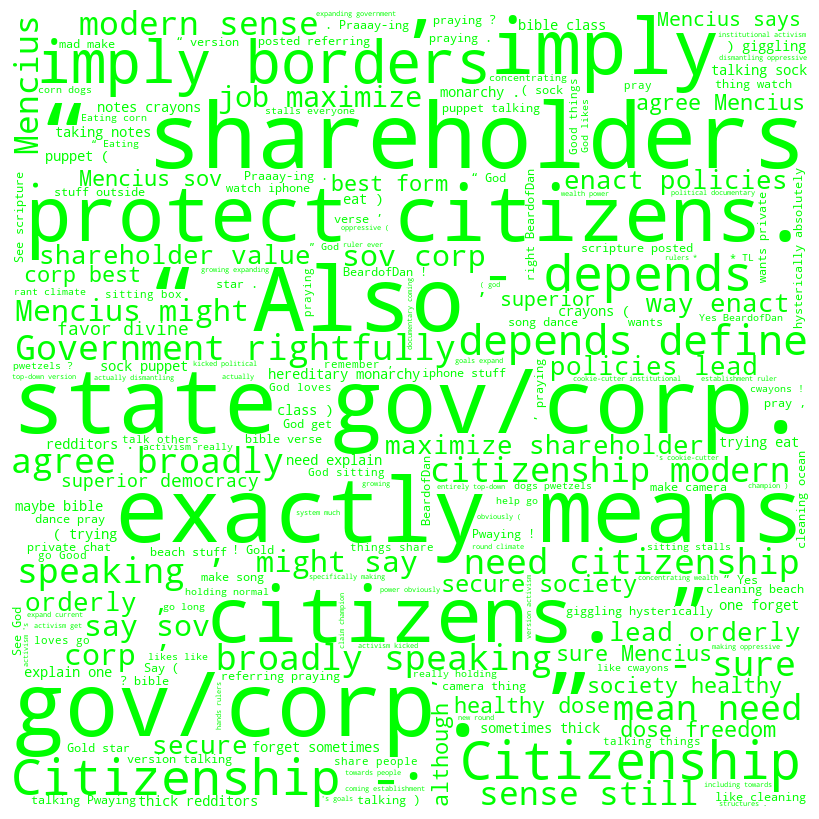

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('processed_test.csv')

# Filter to the top 10 authors
top_authors = df['author'].value_counts().head(10).index
top_authors_df = df[df['author'].isin(top_authors)]

# Create a dictionary of n-grams and their average sentiment
ngrams_sentiment = {}
for index, row in top_authors_df.iterrows():
    ngrams = str(row['ngrams.comment']).split(', ')  # Convert to string to avoid AttributeError
    for ngram in ngrams:
        if ngram not in ngrams_sentiment:
            ngrams_sentiment[ngram] = []
        ngrams_sentiment[ngram].append(row['vader.comment'])

# Calculate the average sentiment for each n-gram
average_sentiment = {ngram: sum(values) / len(values) for ngram, values in ngrams_sentiment.items() if values}

# Define a function to color the n-grams based on sentiment
def color_func(word, **kwargs):
    sentiment = average_sentiment.get(word, 0)
    if sentiment > 0:
        return "hsl(120, 100%, 50%)"  # Green for positive
    elif sentiment < 0:
        return "hsl(0, 100%, 50%)"    # Red for negative
    else:
        return "hsl(60, 100%, 50%)"   # Yellow for neutral

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      color_func=color_func, repeat=False).generate_from_frequencies(average_sentiment)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


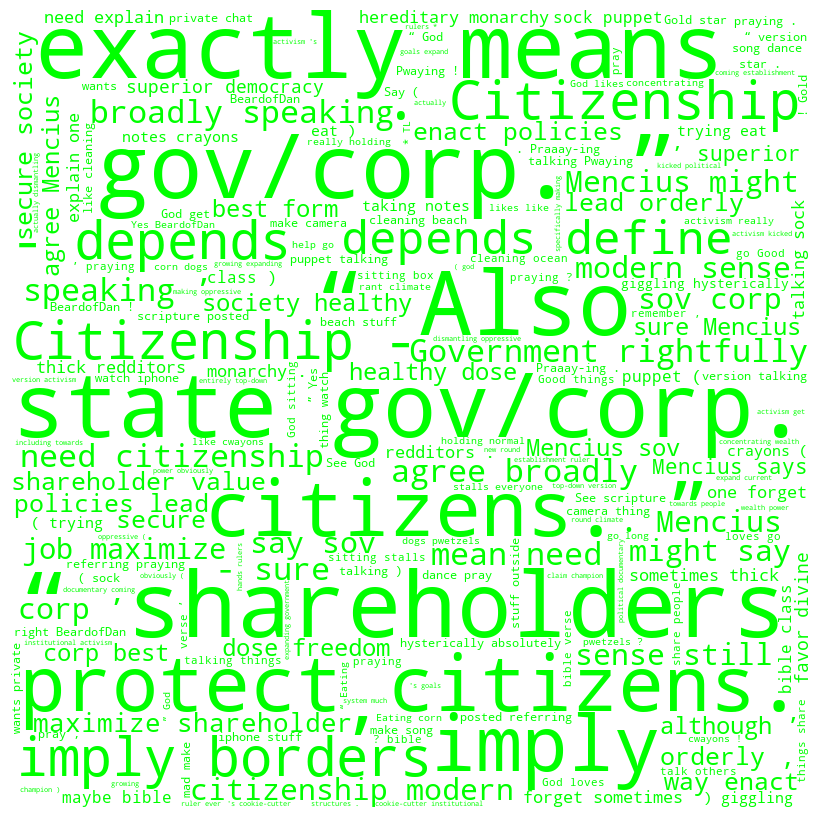

In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('processed_test.csv')

# Keep only rows with non-null 'ngrams.comment' and 'vader.comment'
df = df.dropna(subset=['ngrams.comment', 'vader.comment'])

# Filter to the top 10 authors
top_authors = df['author'].value_counts().head(10).index
top_authors_df = df[df['author'].isin(top_authors)]

# Aggregate ngrams and their sentiments
ngrams_sentiments = {}
for _, row in top_authors_df.iterrows():
    for ngram in row['ngrams.comment'].split(', '):
        if ngram:
            ngrams_sentiments.setdefault(ngram, []).append(row['vader.comment'])

# Calculate the average sentiment for each n-gram
average_sentiment = {ngram: sum(vals) / len(vals) for ngram, vals in ngrams_sentiments.items()}

# Define the color function
def color_func(word, **kwargs):
    sentiment = average_sentiment.get(word, 0)
    if sentiment > 0.1:  # Adjust the threshold as needed
        return "hsl(120, 100%, 50%)"  # Green for positive
    elif sentiment < -0.1:  # Adjust the threshold as needed
        return "hsl(0, 100%, 50%)"    # Red for negative
    else:
        return "hsl(60, 100%, 50%)"   # Yellow for neutral

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', 
                      color_func=color_func, repeat=False).generate_from_frequencies(average_sentiment)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
